In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
data = pd.read_csv('./data/kickstarter.csv')

In [13]:
main_categories = data["main_category"].values
main_categories = np.unique(main_categories)
main_categories = pd.Series(data=main_categories)

In [14]:
def count_items_in_category(df, category, state_param):
    temp = df[df.main_category == category]
    temp = temp[temp.state == state_param]
    series = temp['state'].value_counts()
    return series.at[state_param]

In [15]:
categories_df = pd.DataFrame(columns=['successes', 'fails', 'cancellations'])
categories_df.insert(loc=0, column='main_category', value=main_categories)

for main_category in main_categories:
    categories_df.loc[categories_df['main_category'] == main_category, 'successes'] = count_items_in_category(data, main_category, 'successful')
    categories_df.loc[categories_df['main_category'] == main_category, 'fails'] = count_items_in_category(data, main_category, 'failed')
    categories_df.loc[categories_df['main_category'] == main_category, 'cancellations'] = count_items_in_category(data, main_category, 'canceled')

# Create new column for total number of projects
categories_df['total_projects'] = categories_df.apply(lambda row: row.successes + row.fails + row.cancellations, axis=1)

# Create new column for success ratio (percentage)
categories_df['success_ratio'] = categories_df.apply(lambda row: (row.successes * 100) / row.total_projects, axis=1)

# Sort by success ratio
categories_df = categories_df.sort_values('success_ratio', ascending=False)
categories_df

,main_category,successes,fails,cancellations,total_projects,success_ratio
3,Dance,2338,1235,163,3736,62.580300
14,Theater,6534,3708,608,10850,60.221198
1,Comics,5842,4036,842,10720,54.496269
10,Music,24197,21752,3305,49254,49.126974
0,Art,11510,14131,2222,27863,41.309263
6,Film & Video,23623,32904,5755,62282,37.929097
8,Games,12518,16003,6202,34723,36.051032
4,Design,10550,14814,4152,29516,35.743326
12,Publishing,12300,23145,3602,39047,31.500499
11,Photography,3305,6384,986,10675,30.960187


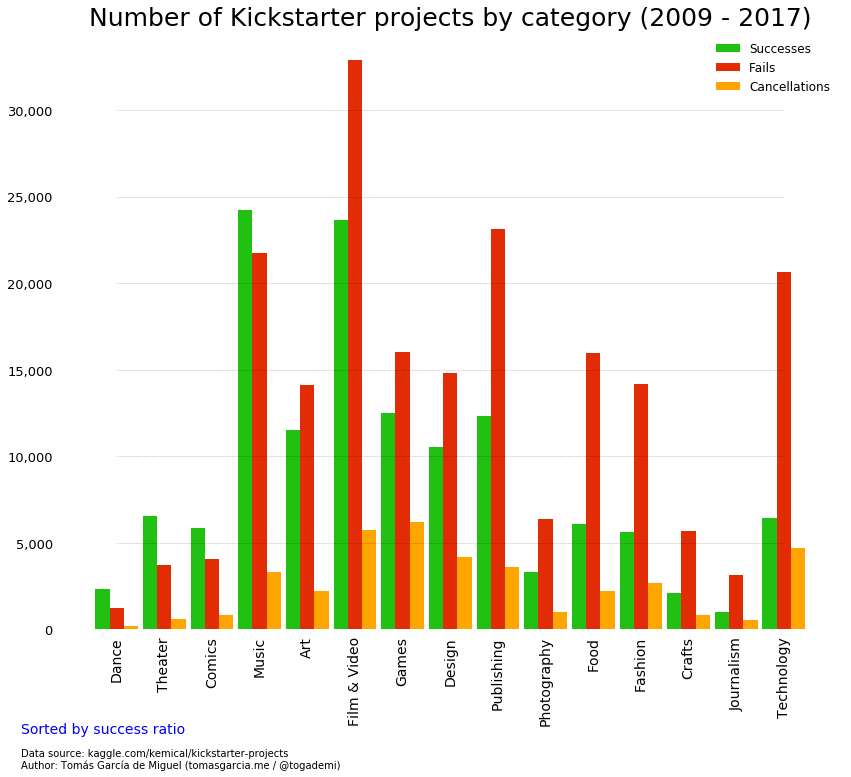

In [16]:
x = np.arange(main_categories.size)
fig, ax = plt.subplots()

width = 0.3
plt.xticks(x, categories_df.main_category, rotation='vertical', fontsize=14)

successes = ax.bar(x - width, categories_df.successes, width, color="#20C113")
fails = ax.bar(x, categories_df.fails, width, color="#E12C05")
cancellations = ax.bar(x + width, categories_df.cancellations, width, color="orange")

plt.title("Number of Kickstarter projects by category (2009 - 2017)", fontsize=25)
plt.yticks(fontsize=13)
plt.legend([successes, fails, cancellations], ["Successes", "Fails", "Cancellations"], 
           fontsize=12, frameon=False)

# Place a thousands separator in the labels of the y axis
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Remove the plot frame lines
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

# Provide tick lines across the plot to help your viewers trace along
for y in range(5000, 35000, 5000):
    plt.plot(range(15), [y] * 15, "--", lw=0.5, color="black", alpha=0.3)

# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", top=False, 
                left=False, bottom=False, right=False, labelleft=True)

# Change size of graph
fig.set_size_inches(14, 11)

plt.text(-2, -6000, "Sorted by success ratio", fontsize=14, color="blue")

plt.text(-2, -8000, "Data source: kaggle.com/kemical/kickstarter-projects"    
       "\nAuthor: Tomás García de Miguel (tomasgarcia.me / @togademi)", fontsize=10)

figure = plt.gcf()
#plt.savefig('graph2.png', dpi=300, bbox_inches="tight")
plt.show()